## Bootstrap

**In a nutshell**: Bootstrapping helps estimation of statisc values (e.g. mean, median) of a large population by repeatedly drawing random samples from sample pupolation and calculate the desired statisc value. When a sample is drawn from the sample population, it must be replaced (Sample with Replacement). For example, a set of sample data contains `[2, 5, 7, 8, 9]`, after we draw 8 from the data, sample data must maintain the original shape `[2, 5, 7, 8, 9]`.

In [91]:
# Libraries for processing arrays faster
import numpy as np
import pandas as pd
# Libraries for drawing graph
import seaborn as sns
import matplotlib.pyplot as plt

## Scenario
**Value we want to estimate**: What's the average **age** of people who's cholesterol level is above 200 mg/dL.  

**Population of interests**: The entire population of `./heart_disease.csv` that has cholesterol level above 200mg/dL. We will use this to examine the value we got from bootstrapping.  

**Sample population**: 30 random samples drawn from population of interests. We will bootstrap this data to make an estimate of population of interests.

In [37]:
df = pd.read_csv('./heart_disease.csv')

## Data Attribute Information
- **age**
- **sex**
- **cp**: 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
- **trestbps**: resting blood pressure
- **chol**: serum cholestoral in mg/dl
- **fb**: fasting blood sugar > 120 mg/dl
- **restecg**: resting electrocardiographic results (values 0,1,2)
- **thalach**: maximum heart rate achieved. Maximum heart rate is calculated by (220 - patient age).
- **exang**: exercise induced angina (reduced blood flow to heart)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment
- **ca**: number of major vessels (0-3) colored by flourosopy
- **thal**: Thalassemia, reduced hemoglobin level. 3 = normal; 6 = fixed defect; 7 = reversable defect

In [38]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**Disclaimer**: Heart diease is a complicated issue. The purpose of this exercise is NOT to predict the onset of heart disease, but to practice statistical techniques.

In [92]:
# Total number of rows
len(df.index)

303

In [94]:
population_of_interests = df[df["chol"] > 200]

In [110]:
# This value will be used to examine the value we get by bootstrapping
population_mean = population_of_interests["age"].mean()

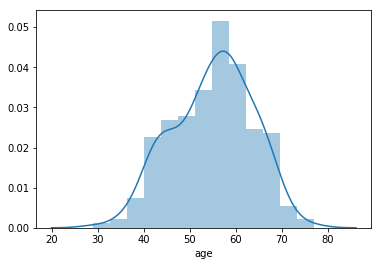

In [99]:
sns.distplot(population_of_interests["age"])

## Beginning of Bootstrap

In [101]:
sample_population = population_of_interests.sample(30, replace=True)

In [102]:
sample_population.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0


## Normal/Gaussian Distribution:
**In a nutshell**: A bell shaped curve that flats out at both end of the peak. Many things that happen in nature follows this curve. For example, blood pressures of people who're still alive. The average blood pressure of healthy people is around 120 mm Hg. Most people that're alive is relatively health and have blood pressure close to that value, few people who are ill have blood pressure a bit far away from the average, and those who're significantly above or below that is either in dying or dead, so they're excluded from the population of interest.  
**y-axis**: Number of occurrence of a specific value.  
**x-axis**: Value of interest, such as blood pressure, age, resting heart rate.
![example](./nd_example.png)  
[image from Stack Overflow](https://stackoverflow.com/questions/10138085/python-plot-normal-distribution)

## Central Limit Therom
**In a nutshell**: If one draws repeatedly from a sample with replacement, calculate the statistic value of interest (e.g mean, median), and aggregate these values, then the distribution of thses value will be approximately normally distributed.  
There're no set rules on how many time we need to randomly draw from the sample, but a good place to start is 1000, and use intuition and observation to increase that number.

In [104]:
n_iterations = 3000
n_size = len(t_sample)
sampling_means_distribution = []
# Run the loop 3000 times, draw random samples in each loop and get there mean
for i in range(n_iterations):
    resample = t_sample.sample(n_size, replace=True)
    resample_mean = resample["age"].mean()
    sampling_means_distribution.append(resample_mean)

In [105]:
np_smd = np.array(sampling_means_distribution)

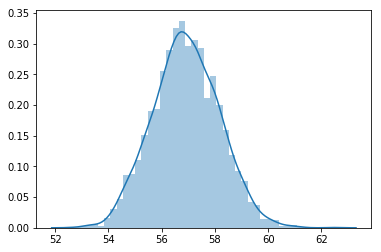

In [108]:
sns.distplot(np_smd)

## Confidence Interval
**Bootstrapping** can **NOT** help us find the true value of the population of interests. Since we can't determine that value, we need a reasonable way to estimate that value the boostrapped value.  

Confidence Interval is a way we estimate that values of the population, in this case the mean age of the population who's level of cholesteral exceeds 200 mg/dL.  

**Confidence Interval** is a range of value (e.g. between 50 - 60) that we're think the statistic value (mean) of the population of interest lie within.

To construct a 95% Confidence Interval, we can sort the data from smallest to largest, and get the value that's on `data_length * 0.025` from the start and `data_length * 0.025` from the end.

In [107]:
sorted_smd = np.sort(np_smd)

In [118]:
# Get value from array and convert to integer.
lower_percentile = sorted_smd[int(n_iterations * n_size * 0.0025)]
upper_percentile = sorted_smd[int(n_iterations - lower_percentile)]

In [119]:
confidence_interval = [lower_percentile, upper_percentile]

In this case, we could say we're 95% certain that the true mean of the population of interest is between 55 to 60.

In [120]:
confidence_interval

[55.1, 59.5]

In [116]:
(round(population_mean) >=

55